# Question 3

In this coding question, you'll implement a classifier with logistic regression
$$ F(w) = \frac{1}{N} \sum_{i=1}^N \log( 1 + e^{-\langle w, x_i \rangle y_i} ). $$

In [52]:
# import statements
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

### Load MNIST Data

In [53]:
# !pip3 install scikit-learn
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)
# this cell processes some of the data

# if this returns an error of the form "KeyError: 0", then try running the following first:
# X = X.values # this converts X from a pandas dataframe to a numpy array

X = X.values
digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X[j].reshape(28,28))
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

X shape: (70000, 784) y shape: (70000,)
X shape: (70000, 784) y shape: (70000,)
Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


### Data PreProcess

In [54]:
x_4 = digits[4][:500].reshape(500,-1)
x_9 = digits[9][:500].reshape(500,-1)

x_4_test = digits[4][500:1000].reshape(500,-1)
x_9_test = digits[9][500:1000].reshape(500,-1)

x_train = np.vstack((x_4, x_9))
x_train = x_train.astype('float32') / 255.0

x_test = np.vstack((x_4_test, x_9_test))
x_test = x_test.astype('float32') / 255.0

y_train = np.hstack((-1 * np.ones(500), np.ones(500)))
y_test = np.hstack((-1 * np.ones(500), np.ones(500)))

### Define $F(w)$ and $\nabla F(w)$

In [55]:
def F(w):
    sum = 0
    N = len(x_train)
    for i in range(N):
        sum += np.log(1 + np.exp(-y_train[i] * np.dot(w, x_train[i])))
    return sum / N

def dF(w):
    sum = 0
    N = len(x_train)
    for i in range(N):
        sum += -y_train[i] * np.exp(-y_train[i] * np.dot(w, x_train[i])) * x_train[i] / (1 + np.exp(-y_train[i] * np.dot(w, x_train[i])))
    return sum / N

## Problem Statement

We will consider the MNIST coding question from HW4. In this question, we run
these questions for *differentiating 4's and 9's*. You can reuse the template
from the previous homework for loading / formatting MNIST. Implement the
following two methods and plot $F(w)$ per iteration for each. You need to submit
(i) the code for the algorithms and plots, and (ii) the plots.

### Gradient descent with backtracking line search

At each iteration $t$, initialize the step size $\mu=10^{-1}$, and use
$\gamma=0.5$ and $\beta = 0.8$ to determine the correct $\mu^{(t)}$. Run your
algorithm for at least 10,000 iterations and plot the loss curve $F(w^{(t)})$ as
a function of $t$.

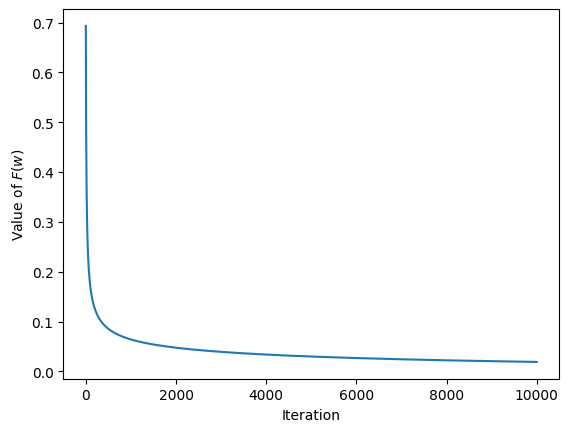

In [56]:
T = 10000

w_values = []
iterations = range(T)

def gd(w, mu = 1e-1):
    return w - mu * dF(w)

def backtrack(w, gamma=0.5, beta=0.8):
    mu = 1e-1
    while F(gd(w, mu)) > F(w) - gamma * mu * np.linalg.norm(dF(w))**2:
        mu *= beta
    return mu

w = np.zeros(x_train.shape[1])
for i in iterations:
    w_values.append(F(w))
    mu = backtrack(w)
    w = gd(w, mu)

plt.plot(iterations, w_values)
plt.xlabel("Iteration")
plt.ylabel(r"Value of $F(w)$")
plt.show()

### Error Rate

In [57]:
error = 0

for i in range(1000):
    if np.dot(w, x_test[i]) > 0:
        y_test[i] = 1
    else:
        y_test[i] = -1
    error += (y_test[i] != y_train[i])

print("Error rate:", error / 1000 * 100, "%")

Error rate: 4.1000000000000005 %


### Gradient Descent with Nesterov acceleration. 

You can experiment with the parameters until you find something you like.

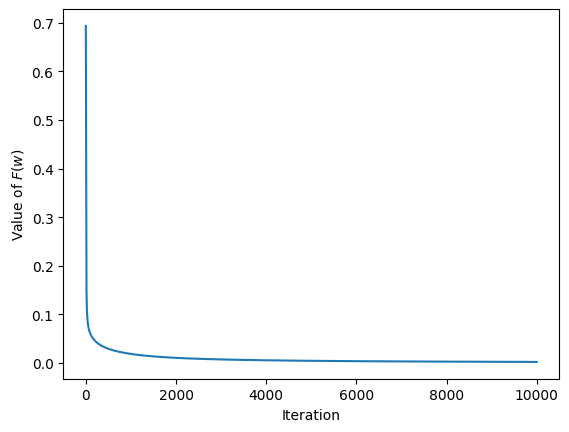

In [58]:
T = 10000

x_values = []
iterations = range(T)

def nesterov(x, x_old, mu = 0.1, beta = 0.9):
    y = x + beta * (x - x_old)
    return y - mu * dF(y)

x = np.zeros(x_train.shape[1])
x_old = np.zeros(x_train.shape[1])
for i in iterations:
    x_values.append(F(x))
    x_temp = x
    x = nesterov(x, x_old)
    x_old = x_temp

plt.plot(iterations, x_values)
plt.xlabel("Iteration")
plt.ylabel(r"Value of $F(w)$")
plt.show()

### Error Rate

In [59]:
error = 0

for i in range(1000):
    if np.dot(x, x_test[i]) > 0:
        y_test[i] = 1
    else:
        y_test[i] = -1
    error += (y_test[i] != y_train[i])

print("Error rate:", error / 1000 * 100, "%")

Error rate: 4.0 %
